In [4]:
%matplotlib inline
import pandas as pd
import os

In [5]:
os.getcwd()

'C:\\Users\\JULIAN\\proyecto-mexico\\notebooks'

In [6]:
compras_df = pd.read_csv('C:\\Users\\JULIAN\\proyecto-mexico\\notebooks\\data\\clean_compras.csv')

In [7]:
compras_df = pd.read_csv ('data/clean_compras.csv')

## Visión general del dataset

In [8]:
compras_df.dtypes

NUM BEN           int64
BENEFICIARIO     object
RFC              object
FACTURA          object
CONTRATO         object
CONCEPTO         object
TIPO             object
# OP            float64
FECHA            object
IMPORTE         float64
SHEET            object
dtype: object

## Análisis unidimensional de las variables

In [9]:
compras_df = compras_df [['BENEFICIARIO', 'FACTURA', 'CONTRATO', 'CONCEPTO', 'TIPO', '# OP', 'FECHA', 'IMPORTE', 'SHEET']]

## Análisis multidimensional de las variables

In [21]:
len(compras_df['CONCEPTO'].unique())

1396

In [10]:
compras_df['BENEFICIARIO'].value_counts()[0:10]

CAMARA MEXICANA DE LA INDUSTRIA DE LA CONSTRUCCION    266
AUTOKAM REGIOMONTANA,S.A.DE C.V.                      101
CAR ONE MONTERREY, S.A. DE C.V.                        78
PEREZ RIOS RAMIRO                                      58
S.I.M.E.P.R.O.D.E.                                     50
INTERASFALTOS, S.A. DE C.V.                            45
GRUPO COYOTE MONTERREY, S.A. DE C.V.                   43
SERVICIO TECNICO CHURUBUSCO, S.A. DE C.V.              30
CFE SUMINISTRADOR DE SERVICIOS BASICOS                 29
CORDERO MACIAS SILVESTRE GUADALUPE                     27
Name: BENEFICIARIO, dtype: int64

<Axes: >

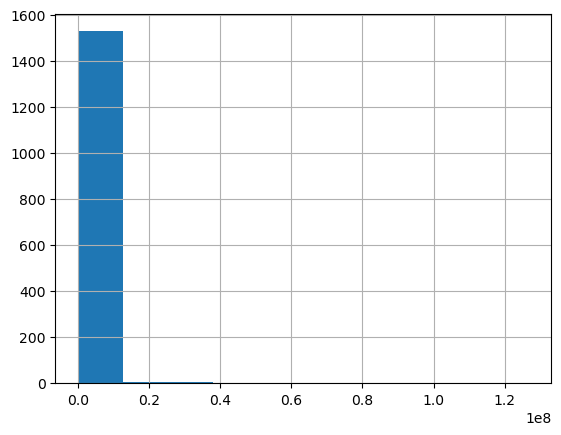

In [11]:
compras_df['IMPORTE'].hist()

<Axes: >

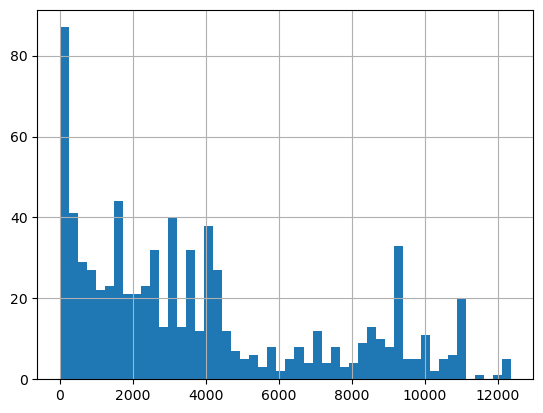

In [12]:
compras_df [compras_df['IMPORTE']< compras_df['IMPORTE'].quantile(0.5)]['IMPORTE'].hist(bins=50)

In [13]:
sum_importe_beneficiario = compras_df.groupby('BENEFICIARIO').sum()['IMPORTE']

C:\Users\JULIAN\AppData\Local\Temp\ipykernel_5864\920206688.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_importe_beneficiario = compras_df.groupby('BENEFICIARIO').sum()['IMPORTE']


In [36]:
sum_importe_beneficiario

BENEFICIARIO
235 PROYECTOS, S.A. DE C.V.                   1649292.36
ABC Y CONSTRUCCIONES, SA. DE CV.              1311087.90
ACEROS Y OVEROLLINGS DE MEXICO, SA. DE CV.       5914.30
ADQUISICIONES INTELIGENTES, S.A. DE C.V.      2132196.00
ALIANZA AUTOMOTRIZ RIVERO, SA. DE CV.          450859.52
                                                 ...    
VILLARREAL CARDENAS JUAN IGNACIO                 3733.13
VILLARREAL CARDENAS NANCY ESTHER                81461.14
VILLARREAL DE LEON BERTHA                       11004.05
VIVERO EL ESCORIAL, S.A. DE C.V.              2511255.46
ZAPATA CHAVIRA HOMERO ARTURO                    28350.00
Name: IMPORTE, Length: 301, dtype: float64

<Axes: xlabel='BENEFICIARIO'>

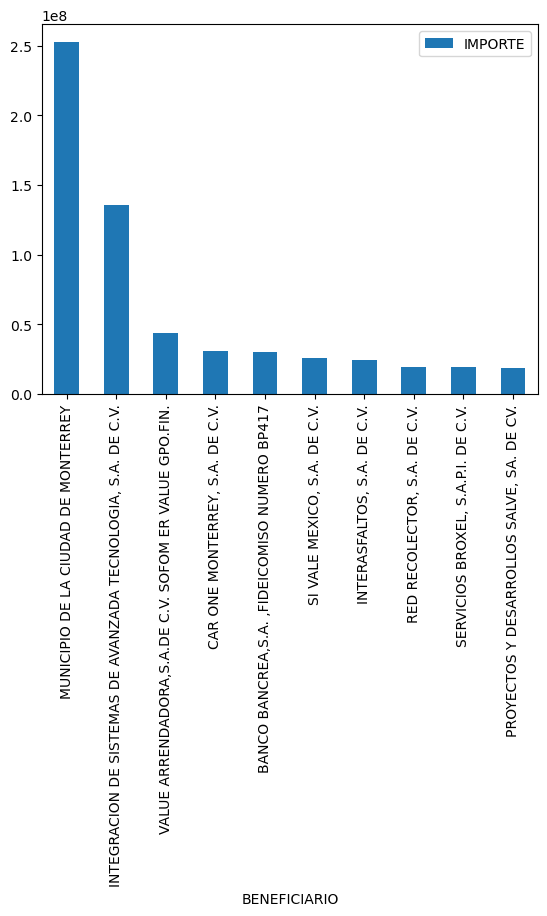

In [14]:
sum_importe_beneficiario.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(kind='bar', x='BENEFICIARIO', y='IMPORTE')

In [15]:
mean_importe_sheet = compras_df.groupby('SHEET').mean()['IMPORTE']

C:\Users\JULIAN\AppData\Local\Temp\ipykernel_5864\4056612233.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_importe_sheet = compras_df.groupby('SHEET').mean()['IMPORTE']


<Axes: xlabel='SHEET'>

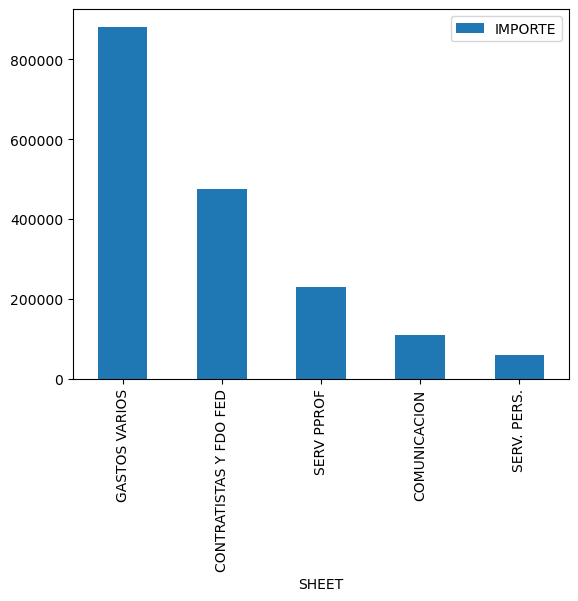

In [16]:
mean_importe_sheet.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(kind='bar', x='SHEET', y='IMPORTE')

In [23]:
mean_importe_sheet.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10]

,SHEET,IMPORTE
2,GASTOS VARIOS,881659.731797
1,CONTRATISTAS Y FDO FED,474566.765787
3,SERV PPROF,229592.166667
0,COMUNICACION,109705.343662
4,SERV. PERS.,59623.405217


In [24]:
sum_importe_fecha = compras_df.groupby('FECHA').sum()["IMPORTE"]

C:\Users\JULIAN\AppData\Local\Temp\ipykernel_5864\4073210084.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_importe_fecha = compras_df.groupby('FECHA').sum()["IMPORTE"]


In [25]:
sum_importe_fecha

FECHA
2020-12-01    2.453181e+04
2020-12-02    3.000000e+04
2020-12-03    1.313241e+05
2020-12-04    7.432247e+07
2020-12-07    1.815018e+06
2020-12-08    1.519824e+08
2020-12-09    4.659596e+05
2020-12-10    1.207010e+06
2020-12-11    1.127524e+08
2020-12-14    3.692338e+05
2020-12-15    1.826510e+04
2020-12-16    2.504067e+06
2020-12-17    1.735205e+08
2020-12-18    1.568875e+08
2020-12-21    9.441760e+05
2020-12-22    6.814845e+07
2020-12-23    3.328571e+07
2020-12-28    1.204764e+08
2020-12-29    2.050000e+05
2020-12-30    6.435889e+07
2020-12-31    1.080281e+06
Name: IMPORTE, dtype: float64

In [26]:
compras_gastos_df = compras_df[compras_df['SHEET'] == 'GASTOS VARIOS']

In [27]:
compras_gastos_df

,BENEFICIARIO,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
0,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS AF8458-158008-3972,OT. 20204373,REEMPLAZO E INSTALACION DE AMORTIGUADORES (DEL...,TR,1019110.0,2020-12-11,14911.80,GASTOS VARIOS
1,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF6916-158008-4041,OT. 20204425,REEMPLAZO E INSTALACION DE OCHO BIRLOS Y NUEVE...,TR,1019110.0,2020-12-11,2528.80,GASTOS VARIOS
2,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF6917-158008-3975,OT. 20204376,REEMPLAZO DE DOS RINES (17). PATRIMONIO 80383...,TR,1019110.0,2020-12-11,8500.02,GASTOS VARIOS
3,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF7004-158008-3971,OT. 20204374,REEMPLAZO DE DOS RINES (14). PATRIMONIO 8007...,TR,1019110.0,2020-12-11,2400.01,GASTOS VARIOS
4,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF7137-158008-4554,OT. 20205130,REEMPLAZO E INSTALACION DE RIN 14. PATRIMONIO ...,TR,299001496.0,2020-12-23,1537.00,GASTOS VARIOS
...,...,...,...,...,...,...,...,...,...
685,"GS GAS Q, S.A. DE C.V.",BPLGK78471438-158003-5626,SAD-619-2020,CONSUMO DE GASOLINA DELA SEMANA 12 AL 18 DE OC...,TR,1019144.0,2020-12-18,510120.43,GASTOS VARIOS
686,"GS GAS Q, S.A. DE C.V.",BPLGK78471458-158003-5605,SAD-619-2020,CONSUMO DE GASOLINA DELA SEMANA 05 AL 11 DE OC...,TR,1019144.0,2020-12-18,668569.94,GASTOS VARIOS
687,"GS GAS Q, S.A. DE C.V.",BPLGK78471506-158003-5728,SAD-619-2020,CONSUMO DE DIESEL SEMANA DE 07 AL 13 DE SEPTIE...,TR,1019144.0,2020-12-18,276906.57,GASTOS VARIOS
688,"GS GAS Q, S.A. DE C.V.",BPLGK78471508-158003-5744,SAD-619-2020,CONSUMO DE GASOLINA DE LA SEMANA 7 AL 13 DE SE...,TR,1019144.0,2020-12-18,413735.30,GASTOS VARIOS


<Axes: >

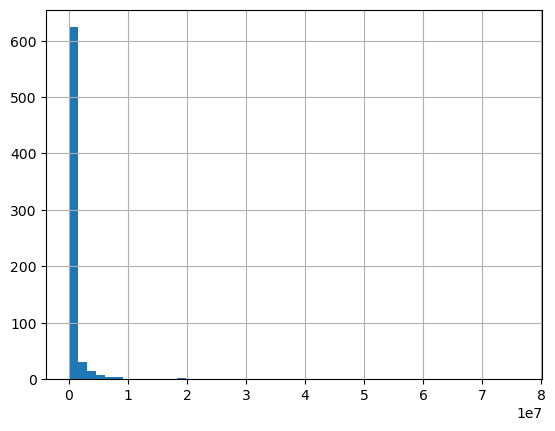

In [28]:
compras_gastos_df ['IMPORTE'].hist(bins=50)

In [30]:
compras_gastos_df[compras_gastos_df['BENEFICIARIO']=="MUNICIPIO DE LA CIUDAD DE MONTERREY"]

,BENEFICIARIO,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
367,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-23-A-158004-1734,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2020, BANCO: BANCA ...",TR,11000196.0,2020-12-17,73864368.92,GASTOS VARIOS
368,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-23-B-158004-1735,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2020, BANCO: BANCO ...",TR,231000103.0,2020-12-17,76352493.81,GASTOS VARIOS
369,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-23-C-158004-1733,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2020, BANCO: BANCO ...",TR,240000108.0,2020-12-17,19246138.70,GASTOS VARIOS
370,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-A-158004-1760,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020, BANCO: BANCA ...",TR,11000197.0,2020-12-28,36101891.39,GASTOS VARIOS
371,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-A-158004-1780,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020-E1, BANCO: BAN...",TR,11000198.0,2020-12-28,27443.46,GASTOS VARIOS
372,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-B-158004-1761,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020, BANCO: BANCO ...",TR,231000104.0,2020-12-28,33579364.01,GASTOS VARIOS
373,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-B-158004-1781,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020-E1, BANCO: BAN...",TR,231000105.0,2020-12-28,132688.02,GASTOS VARIOS
374,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-C-158004-1759,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020, BANCO: BANCO ...",TR,240000109.0,2020-12-28,13362855.08,GASTOS VARIOS
375,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-C-158004-1779,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020-E1, BANCO: BAN...",TR,240000110.0,2020-12-28,17925.96,GASTOS VARIOS
376,MUNICIPIO DE LA CIUDAD DE MONTERREY,158002-470,NO APLICA,FINIQUITO DE FONDO OPERATIVO DE LA SECRETARÍA ...,CH,299000198.0,2020-12-30,1439.20,GASTOS VARIOS


In [32]:
compras_df.groupby(['BENEFICIARIO', 'SHEET']).sum()['IMPORTE'].sort_values().unstack('SHEET')

C:\Users\JULIAN\AppData\Local\Temp\ipykernel_5864\1529016118.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  compras_df.groupby(['BENEFICIARIO', 'SHEET']).sum()['IMPORTE'].sort_values().unstack('SHEET')


SHEET,COMUNICACION,CONTRATISTAS Y FDO FED,GASTOS VARIOS,SERV PPROF,SERV. PERS.
BENEFICIARIO,,,,,
"235 PROYECTOS, S.A. DE C.V.",NaN,NaN,1649292.36,NaN,NaN
"ABC Y CONSTRUCCIONES, SA. DE CV.",NaN,1311087.9,NaN,NaN,NaN
"ACEROS Y OVEROLLINGS DE MEXICO, SA. DE CV.",NaN,NaN,5914.30,NaN,NaN
"ADQUISICIONES INTELIGENTES, S.A. DE C.V.",NaN,2132196.0,NaN,NaN,NaN
"ALIANZA AUTOMOTRIZ RIVERO, SA. DE CV.",NaN,NaN,450859.52,NaN,NaN
...,...,...,...,...,...
VILLARREAL CARDENAS JUAN IGNACIO,NaN,NaN,NaN,NaN,3733.13
VILLARREAL CARDENAS NANCY ESTHER,NaN,NaN,NaN,NaN,81461.14
VILLARREAL DE LEON BERTHA,NaN,NaN,11004.05,NaN,NaN


In [33]:
compras_df[compras_df['BENEFICIARIO'] == "MUNICIPIO DE LA CIUDAD DE MONTERREY"]['SHEET'].value_counts()

GASTOS VARIOS             11
CONTRATISTAS Y FDO FED     5
Name: SHEET, dtype: int64

In [34]:
compras_sheet_beneficiario = compras_df.groupby(['BENEFICIARIO', 'SHEET']).sum()['IMPORTE'].sort_values().unstack('SHEET')

C:\Users\JULIAN\AppData\Local\Temp\ipykernel_5864\759309205.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  compras_sheet_beneficiario = compras_df.groupby(['BENEFICIARIO', 'SHEET']).sum()['IMPORTE'].sort_values().unstack('SHEET')


In [35]:
top_beneficiarios = compras_df.groupby('BENEFICIARIO')['IMPORTE'].sum().sort_values(ascending=False).index[0:10]

<Axes: xlabel='BENEFICIARIO'>

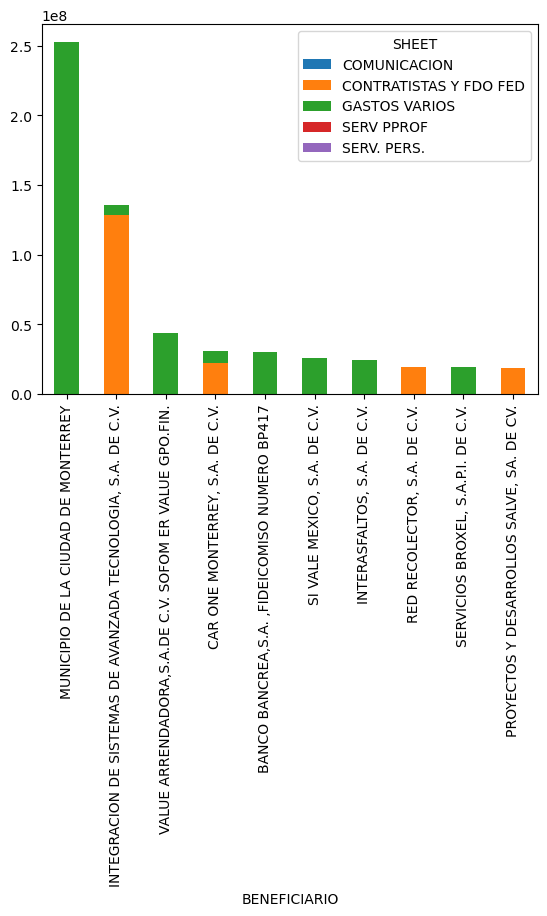

In [36]:
compras_sheet_beneficiario.loc[top_beneficiarios].plot.bar(stacked= True)

## Análisis de texto

In [52]:
pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   --------------- ------------------------ 112.6/300.2 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 3.7 MB/s eta 0:00:00


In [54]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('spanish'))

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\JULIAN/nltk_data'
    - 'C:\\Users\\JULIAN\\anaconda3\\nltk_data'
    - 'C:\\Users\\JULIAN\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\JULIAN\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\JULIAN\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [55]:
textos_compras = ''
for row in compras_df['CONCEPTO']: 
    textos_compras = textos_compras + ' ' + row

In [56]:
stopwords_list = stopwords.words('spanish') + ['2020', 'cont', 'millar', 'dpp', 'est', 'op', 'ret', 'mty', 'icom']

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\JULIAN/nltk_data'
    - 'C:\\Users\\JULIAN\\anaconda3\\nltk_data'
    - 'C:\\Users\\JULIAN\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\JULIAN\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\JULIAN\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [57]:
textos_compras = ' '.join([x for x in textos_compras.strip().lower().split(' ') if x not in stopwords_list and len(x)>4])

NameError: name 'stopwords_list' is not defined

In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

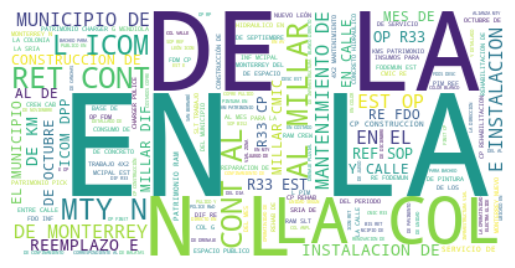

In [60]:
wc = WordCloud(background_color= 'white')
wc.generate(textos_compras)

plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()